In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import preprocessing

import seaborn as sns

# KNN 

In [18]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [19]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


- 1 = Basic Service
- 2 = E-service
- 3 = Plus Service
- 4 = Total Service

In [20]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

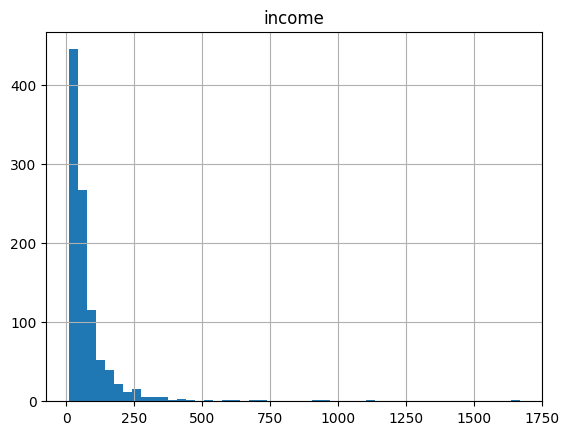

In [21]:
df.hist(column="income",bins=50)

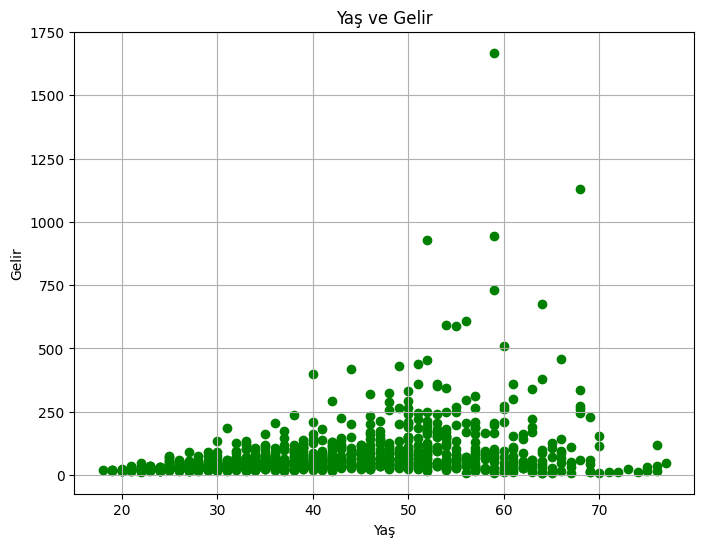

In [22]:

plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['income'], marker='o', c='green')
plt.title('Yaş ve Gelir')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.grid(True)
plt.show()

<Axes: xlabel='age', ylabel='income'>

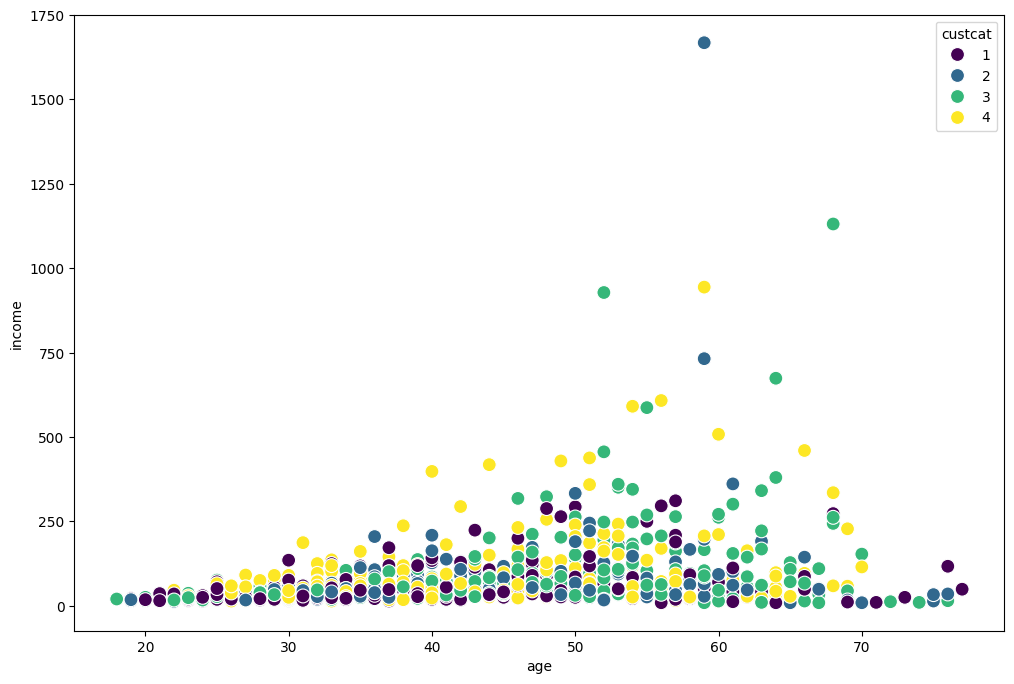

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='income',hue='custcat',data=df, palette='viridis',s=100)

- 1- Pick a value for K.
- 2- Calculate the distance of unkown case from all cases. (dissimilarity)
- 3- Select the K- observation in the training data that are "nearest" to the unknown data point.
- 4- Predict the response of the unknown data point, using the most popular response value from the nearest neighbors.

For unkown case, first pick K=1
Calculate and make prediction until k=20
Compare results.

 # Exercise
 - Normalize the data: StandartScaler
 - KNeighborsClassifier
 - K=4

In [25]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


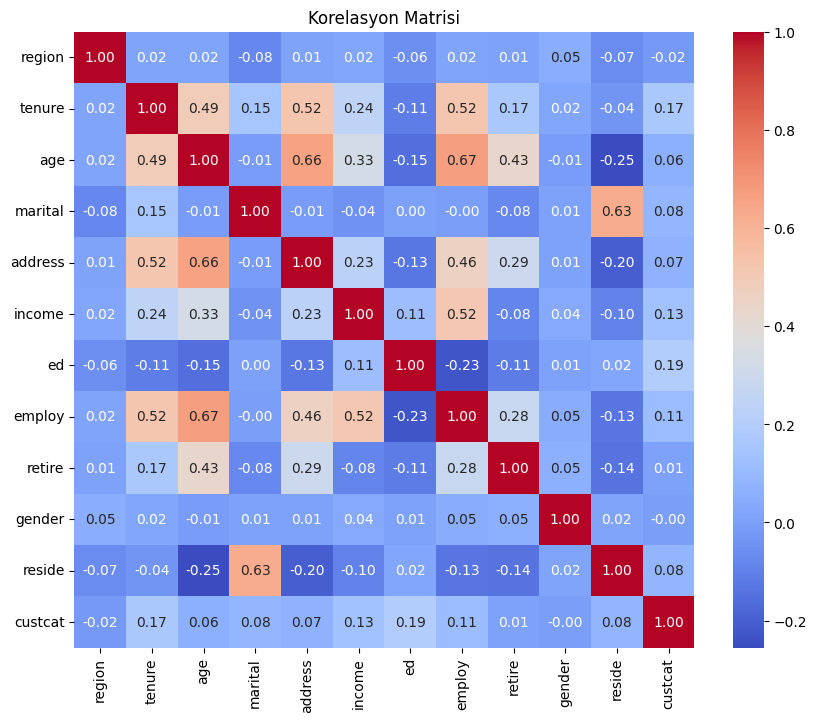

In [73]:
#korelesyon matirisi ile veriyi inceleyip arasındaki ilişkilere baktım
new_df = pd.DataFrame(df)
correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

KNN için seçilen değişkenlerin birbirleriyle yüksek korelasyon içinde olmaması daha öenmli. (dissimilarity)

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)



In [29]:
df_normalized = pd.DataFrame(scaled_df, columns=df.columns)

print("Normalized:")
print(df_normalized)

Normalized:
       region    tenure       age   marital   address    income        ed  \
0   -0.026968 -1.055125  0.184505  1.010051 -0.253034 -0.126506  1.087753   
1    1.198836 -1.148806 -0.691812  1.010051 -0.451415  0.546450  1.906227   
2    1.198836  1.521092  0.821826  1.010051  1.234819  0.359517 -1.367671   
3   -0.026968 -0.118319 -0.691812 -0.990050  0.044536 -0.416251 -0.549196   
4   -0.026968 -0.586722 -0.930808  1.010051 -0.253034 -0.444291 -1.367671   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.198836 -1.195646 -0.213821 -0.990050 -1.145747 -0.472331  0.269278   
996 -1.252771 -1.336167 -0.612147 -0.990050 -0.947366 -0.519064  1.906227   
997  1.198836  1.474252  1.379482 -0.990050  2.821863  8.098513  1.906227   
998  1.198836  1.614773  0.582830 -0.990050  0.639678  0.088466 -0.549196   
999  1.198836  0.677967 -0.452817  1.010051 -0.451415 -0.360172  0.269278   

       employ    retire    gender    reside   custcat  
0   -0.

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [92]:
train, test=train_test_split(df, test_size=0.2)

In [96]:
train_x=np.asanyarray(train[['income','age','tenure']]) #Daha sonra bu değişkenleri değiştirerek tekrar dene
train_y=np.asanyarray(train[["custcat"]])

test_x=np.asanyarray(test[['income','age','tenure']])
test_Y=np.asanyarray(test[["custcat"]])



In [97]:

# Veriyi normalize etmek için:
# Burada değişkenleri daha yakın ölçekli hale getirdik
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(train_x)
X_test_normalized = scaler.transform(test_x)



In [98]:
# KNeighborsClassifier kullandığımız yer
#k=4 olacak şekilde
knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X_train_normalized, train_y)

y_predicted = knn.predict(X_test_normalized) #Burada x_test_normalized kısmı ile oluyor sadece. Diğer şekilde hata verdi bu kısmı araştır

#accuracy
accuracy = accuracy_score(test_Y, y_predicted) #hedef için yaptık
print("accuracy:", accuracy)

accuracy: 0.26


c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Şu ana kadar denediğim değerler arasında en yüksek accuracy 'income','age' değişkenlerini kullanarak elde ettiklerim oldu.

#Check accuracy of Ks

In [102]:
from sklearn import metrics
Ks=10
mean_acc=np.zeros((Ks-1))
mean_acc
std_acc=np.zeros((Ks-1))

for i in range(1,Ks):
    # train and prediction for each k
    neigh=KNeighborsClassifier(n_neighbors=n).fit(train_x,train_y)
    y_hat=neigh.predict(test_x)
    mean_acc[n-1]=metrics.accuracy(test_Y,y_hat)
    std_acc[n-1]=np.std(y_hat==test_Y)/np.sqrt(y_hat.shape[0])

NameError: name 'n' is not defined